# DataTrained Practice Project 1

## Happiness Score Prediction

### Table of content:
* [Introduction: The Problem](#introduction)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Data](#data)

### Introduction: The Problem <a name='introduction'></a>

<p>
   The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
</p>

### Methodology <a name="methodology"></a>

In this analysis, we are tasked to predict the Happiness Scores from the data. This is a Supervised Regression Problem. First we will start with observing some basics statistics of the data. This is followed by EDA through visualization. Once this is done, we perform some data preprocessing in order to make the data suitable for the regression algorithms.
<p>Following this, we find the best random_state and then try several regression algorithms. Lastly, we choose the best model and then perfrom hyper parameter tuning to obtain the best achievable accuracy.</p>

### Analysis <a name="analysis"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
happinessDf = pd.read_csv('happiness_score_dataset.csv')
happinessDf.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Data <a name='data'></a>

The dataset contains 158 rows and 12 columns. Out of these columns, our target variable is 'Happiness Score'

In [4]:
happinessDf.describe(include='all')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Denmark,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,NaN,NaN,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,NaN,NaN,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,NaN,NaN,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,NaN,NaN,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,NaN,NaN,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415


From the summary table, we observe the following:
<ol>
    <li>For most of the columns, the mean is close to the 50th percentile. This means data might have skewness and needs to be checked.</li>
    <li>The difference between the 75th percentile and maxiumn value for the columns is not very large</li>
    <li>From observation 1 & 2, it is hard to conclude if outliers are present or not. Later in the analysis, we will use boxplot and z-score to detect and eliminate outliers, if present.</li>
</ol>

In [5]:
happinessDf.shape

(158, 12)

The dataset has 158 rows and 12 columns

In [6]:
happinessDf.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There is no null missing value in this dataset

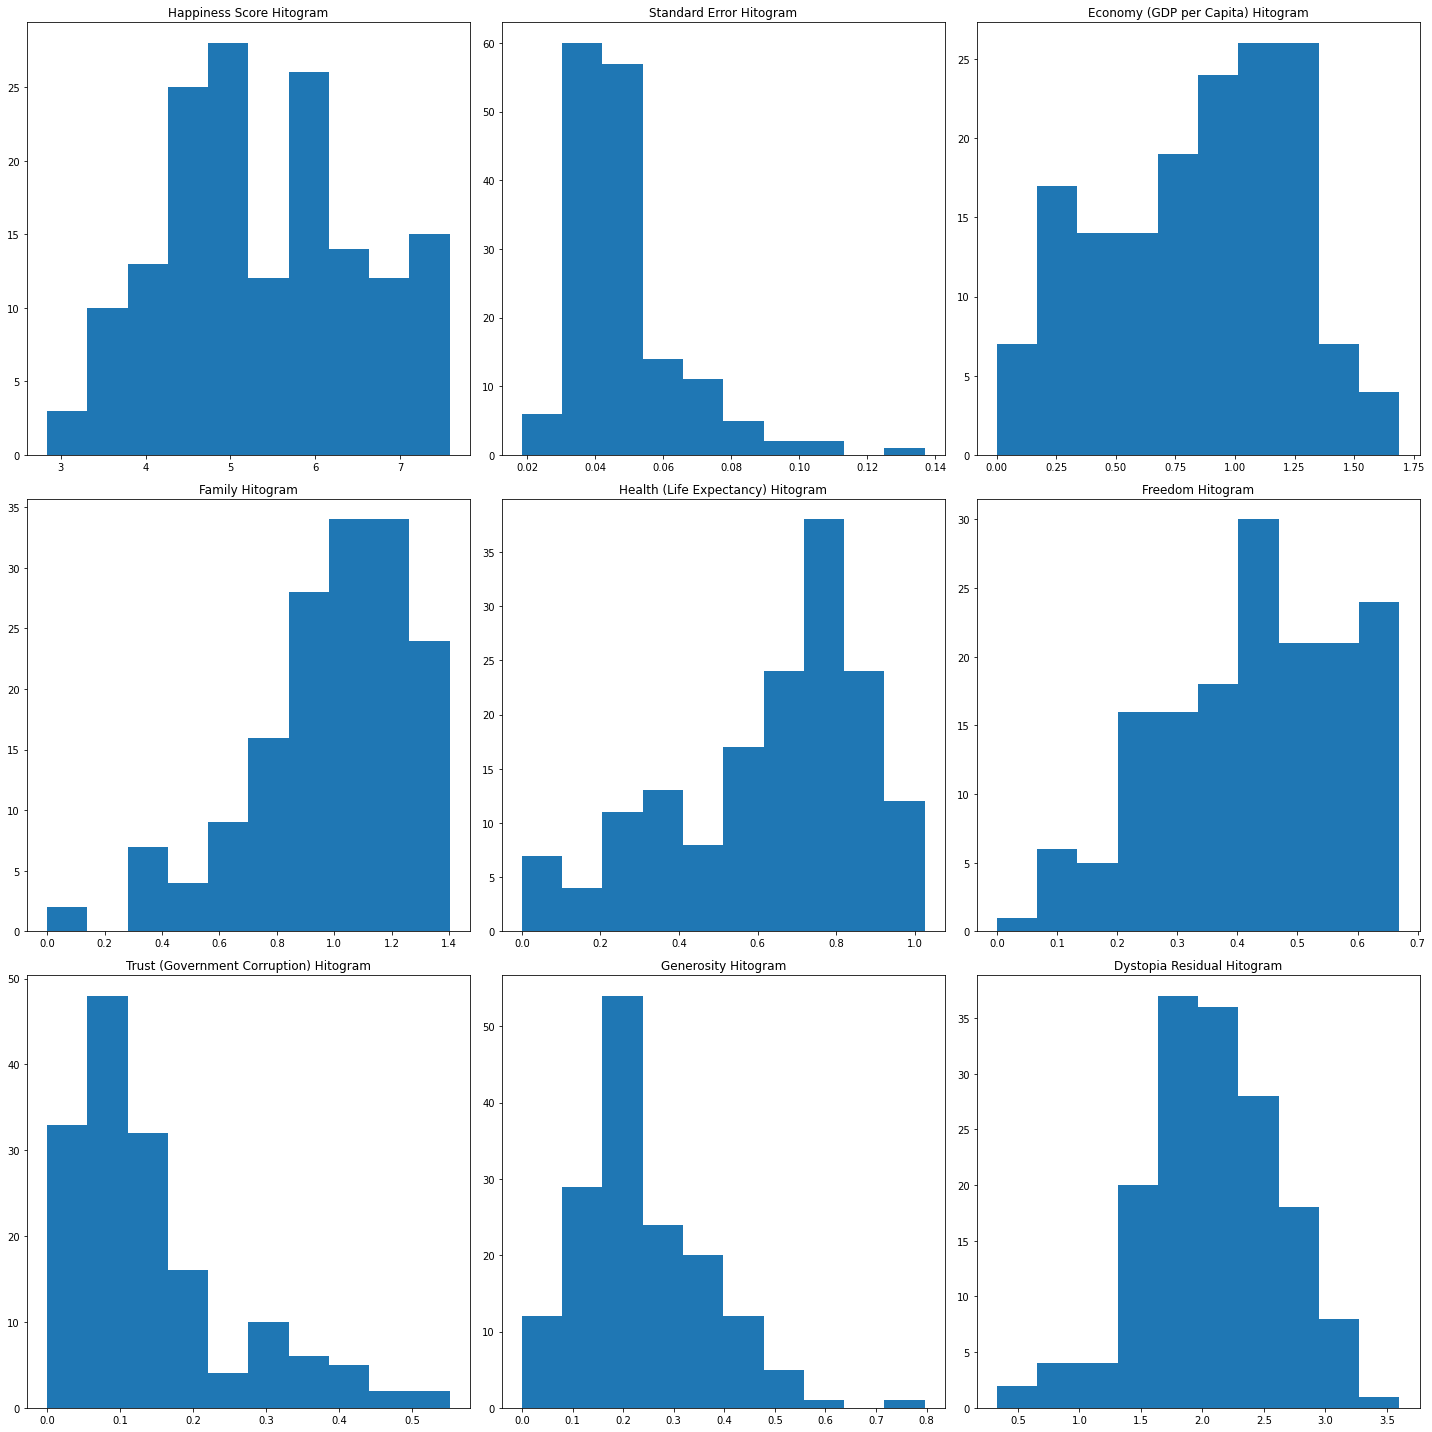

In [7]:
figure =  plt.subplots(3,3, figsize=(20,20))
plotColNames = list(happinessDf.drop(['Country', 'Region', 'Happiness Rank'], axis=1).columns)
for index in range(0,9):
    plt.subplot(3,3,index+1)
    plt.hist(happinessDf[plotColNames[index]])
    plt.title(f'{plotColNames[index]} Hitogram')
    plt.tight_layout()

On visual inspection of the histograms above, we can see that there is all columns except 'Dystopia Residual Histogram' have skewness and needs to be removed later.

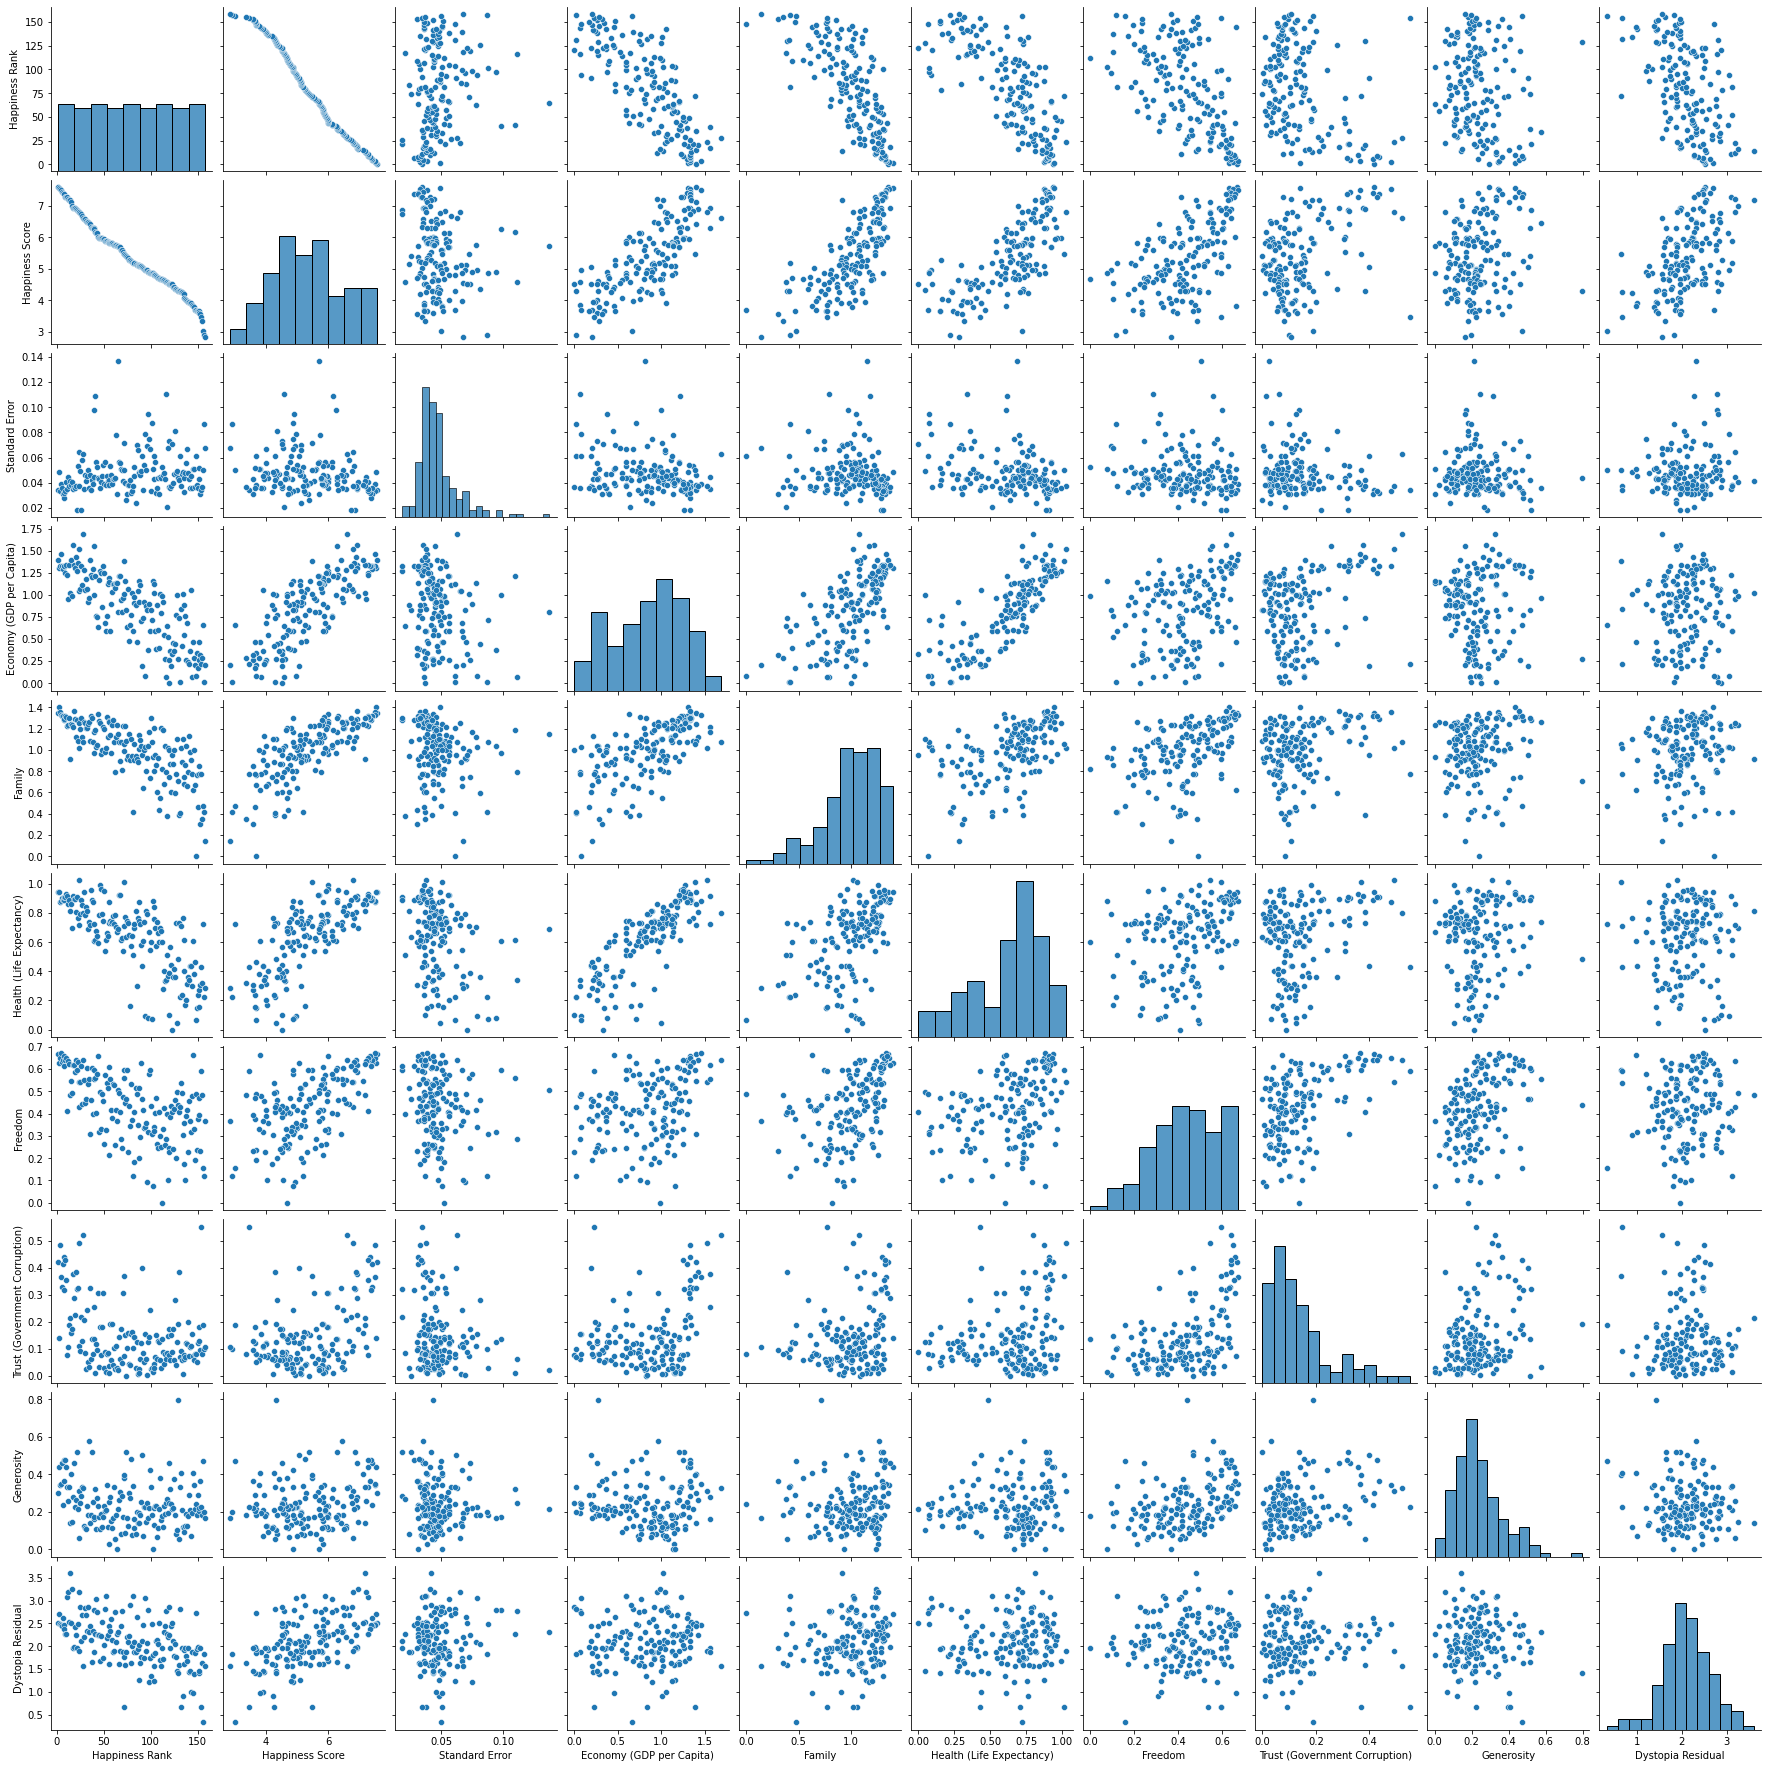

In [8]:
sns.pairplot(happinessDf)
plt.show()

<p>From the pairplots, if we direct our attention to the second row, we see that 'Happiness Score' is strong positive correlated with the columns 'Economy (GDP Per Capita)', 'Family', and 'Health (Life Expectancy)' while it has moderate/good positive correlation with 'Freedom', 'Trust (Government Corruption)', 'Generiosity' and 'Dystopia Residual'. These observations are confirmed by the heatmap below.</p>

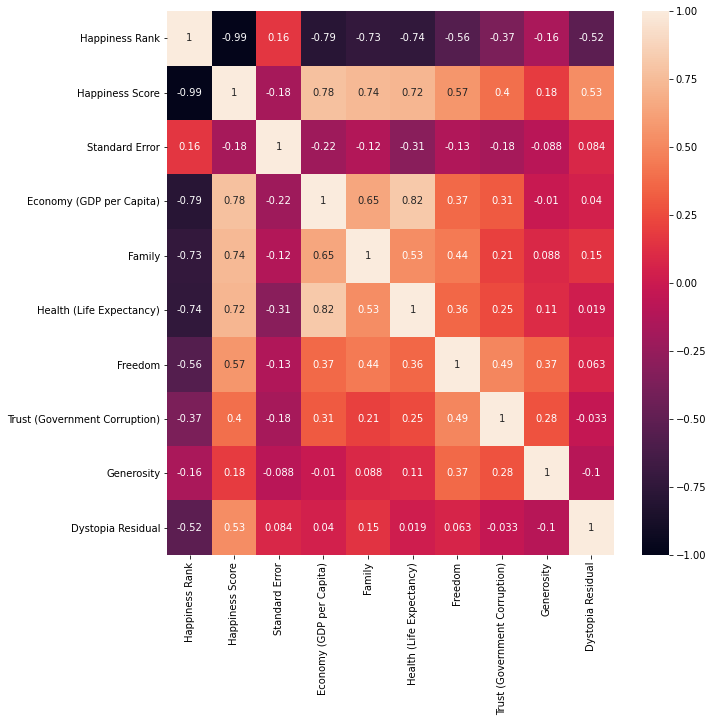

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(happinessDf.corr(), annot=True, vmin = -1, vmax=1)
plt.show()

The columns 'Economy (GDP Per Capita)','Family' and 'Health (Life Expectency)' are highly correlated to 'Happiness Score'

Text(0, 0.5, 'Happiness Score')

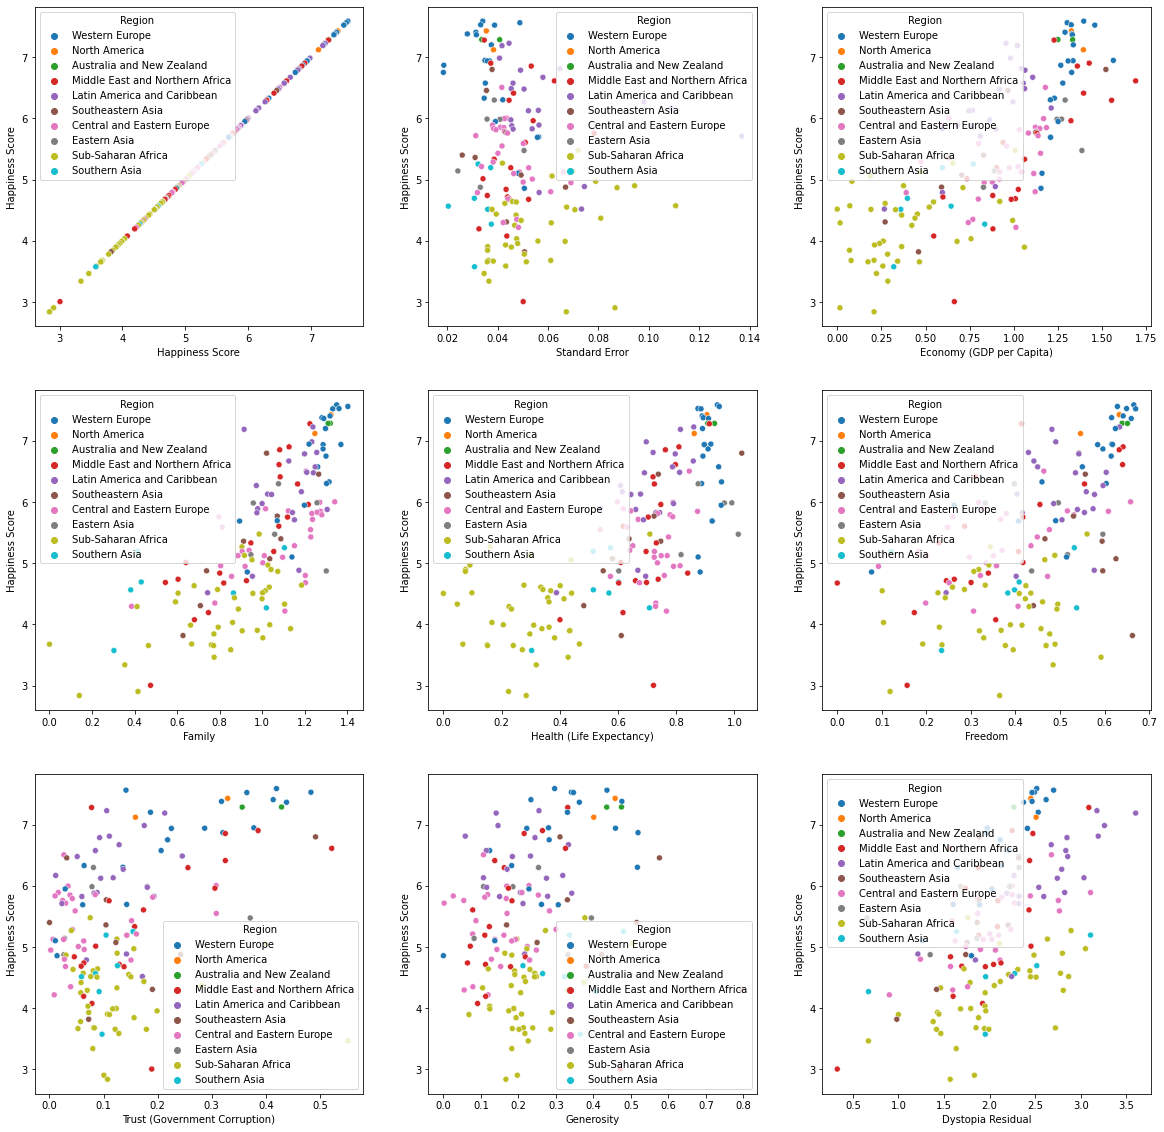

In [10]:
figure = plt.subplots(3,3, figsize=(20,20))

for index in range(0,9):
    plt.subplot(3,3,index+1)
    sns.scatterplot(plotColNames[index], "Happiness Score", hue='Region', data=happinessDf)
    plt.xlabel(f'{plotColNames[index]}')
plt.ylabel('Happiness Score')

From the graphs above, we can see that the regions in Western Europe have one of the highest happiness scores while those in Sub-Saharan Africa have one of the lowest scores. For those with high happiness scores, they also have higher values in the columns such as Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom and Dystopia Residual.

<p>
    Apart from visualization, the column 'Country' and 'Region' dont really have significance for happiness score prediction. Therefore, we will drop these columns later during analysis.
</p>

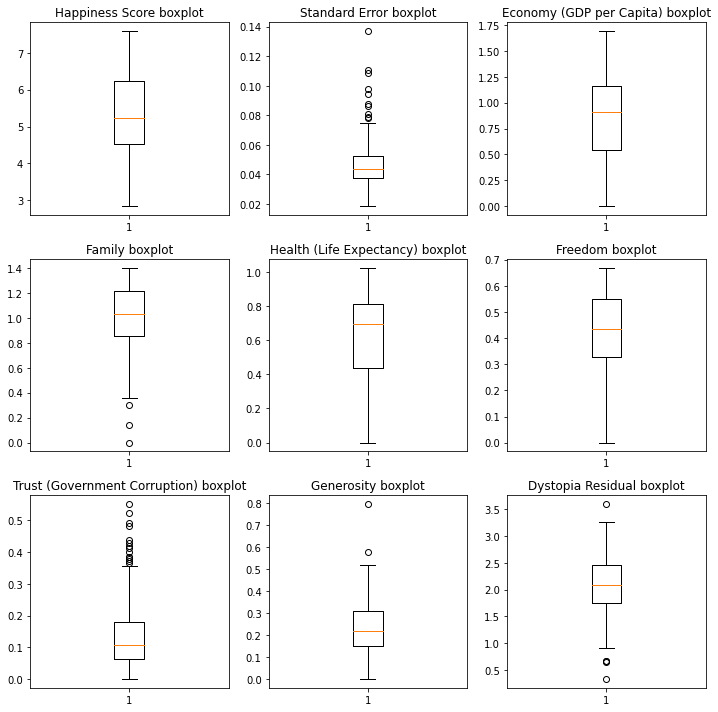

In [11]:
#boxplot for outliers
figure = plt.subplots(3,3, figsize=(10,10))
for index in range(0,9):
    plt.subplot(3,3,index+1)
    plt.boxplot(happinessDf[plotColNames[index]])
    plt.title(f'{plotColNames[index]} boxplot')
    plt.tight_layout()
plt.show()

Since most of the outliers are close to the boxplots, we will ingnore them as they are not very large.

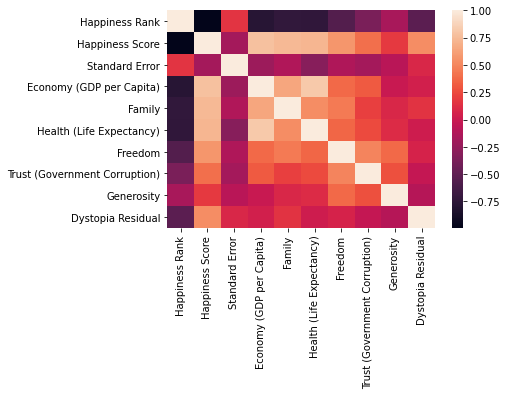

In [12]:
sns.heatmap(happinessDf.corr())
plt.show()

Columns Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom and Dystopia Residual have high correlation with 'Happiness Score'

In [13]:
happinessDf.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [14]:
#Spliting the X and Y variables
x = happinessDf.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis = 1)
y = happinessDf['Happiness Score']

In [15]:
#Removing skewness from X
x1 = power_transform(x, standardize = True)
x1 = pd.DataFrame(x, columns=x.columns)

In [16]:
#Finding the best random state
maxAcc = 0
maxRs = 0
for randState in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.30, random_state=randState)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    predlr = lr.predict(x_test)
    acc = lr.score(x_test, y_test)*100
    if acc>maxAcc:
        maxAcc=acc
        maxRs=randState
print(f"Best accuracy is {round(maxAcc, 2)}% on Random state {randState}")

Best accuracy is 100.0% on Random state 199


In [17]:
#Spliting the dataset into Train and Test sets
x_train199, x_test199, y_train199, y_test199 = train_test_split(x1, y, test_size=0.30, random_state=199)

In [18]:
#Linear Regression
lr = LinearRegression()
lr.fit(x_train199, y_train199)
accLr = lr.score(x_test199, y_test199)*100
print(f"Linear Regression accuracy is {accLr}%")

Linear Regression accuracy is 99.99999260694452%


In [19]:
#Support Vector Regressor
svr = SVR()
svr.fit(x_train199, y_train199)
accSvr = svr.score(x_test199, y_test199)*100
print(f"SVR accuracy is {accSvr}%")

SVR accuracy is 98.50999782029636%


###### Cross Validation

In [20]:
cvsLr = cross_val_score(lr, x1, y, cv=5)
print(f'Cross Validation score for LinearRegression is {cvsLr.mean()*100}')

Cross Validation score for LinearRegression is 99.99981871007762


In [21]:
cvsSvr = cross_val_score(svr, x1, y, cv=5)
print(f'Cross Validation score for SVR is {cvsSvr.mean()*100}')

Cross Validation score for SVR is 2.907769082849887


<table>
    <thead>
        <tr>
            <th>Classifier</th>
            <th>Accuracy Score</th>
            <th>Cross Validation Score</th>
            <th>Score Difference</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style='color:green'>Linear Regression</td>
            <td style='color:green'>99.99999</td>
            <td style='color:green'>99.999818</td>
            <td style='color:green'>0.000172</td>
        </tr>
        <tr>
            <td>SVR</td>
            <td>98.51</td>
            <td>2.91</td>
            <td>95.6</td>
        </tr>


</table>

###### Hyperparameter tuning

In [22]:
parameters = {'fit_intercept': [True, False],
             'normalize': [True, False],
             'n_jobs': [2,10,20,50,100,150,200],
             'positive': [True, False]}

GsLr = GridSearchCV(LinearRegression(), parameters, cv=5)
GsLr.fit(x_train, y_train)
GsLr.best_params_

{'fit_intercept': False, 'n_jobs': 2, 'normalize': True, 'positive': True}

In [23]:
newLr = LinearRegression(fit_intercept = False, n_jobs = 2, normalize = True, positive = True)
newLr.fit(x_train, y_train)
newLr.score(x_test, y_test)*100

99.9999926077206

###### Saving the model

In [24]:
import joblib
joblib.dump(newLr,'happiness.pkl')

['happiness.pkl']

In [25]:
#Checking the model
model = joblib.load('happiness.pkl')
model.predict(x_test)

array([5.12894953, 2.83889257, 5.14041146, 4.97122308, 3.68084235,
       6.50509487, 7.18724789, 4.86729669, 5.88901938, 5.87838416,
       3.89650341, 4.78793172, 6.48511422, 7.52698238, 5.05723502,
       4.5171519 , 5.10168568, 5.60462358, 4.95930998, 6.85292229,
       5.75854   , 3.9888388 , 6.41108919, 5.1936678 , 5.25286068,
       4.29652948, 5.71590544, 5.79064644, 4.63348868, 5.8552474 ,
       5.77042893, 4.68550028, 3.93090786, 4.34993288, 5.98367934,
       4.30696091, 6.26928932, 4.94867795, 4.87432386, 3.65513263,
       5.98703487, 4.64238794, 6.29477395, 3.65592456, 5.0070278 ,
       5.94815226, 5.12415664, 6.79761821])